In [29]:
import pandas as pd
import numpy as np

# 한국인, 일본인 각 성인 1000명 육류소비량 데이터 생성
meat_consumption_korean = 5*np.random.randn(1000) + 53.9
meat_consumption_japan = 4*np.random.randn(1000) + 32.7

# 데이터 프레임 생성
meat_consumption = pd.DataFrame({"한국인":meat_consumption_korean, "일본인":meat_consumption_japan})

# 상위 6개 데이터 확인
meat_consumption.head(6)

,한국인,일본인
0,54.345164,28.501062
1,56.963838,38.921601
2,52.161936,34.688692
3,50.748484,39.656851
4,53.227220,38.833050
5,56.596210,30.504879


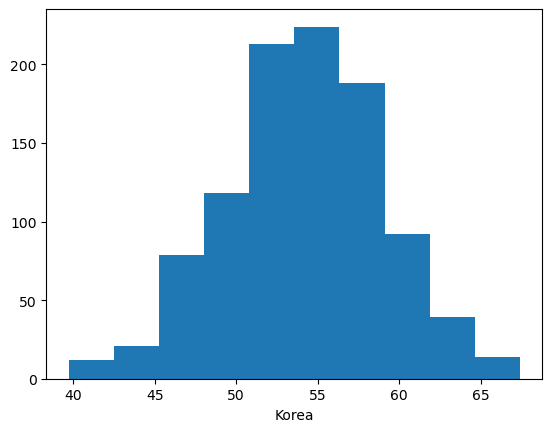

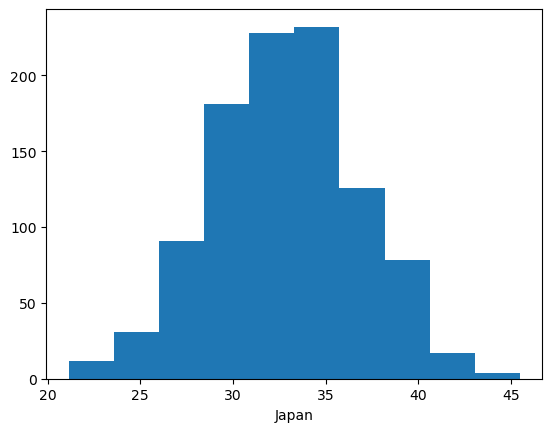

In [30]:
import matplotlib.pyplot as plt

# 한국인 육류소비량 히스토그램
plt.hist(meat_consumption_korean)
plt.xlabel('Korea')
plt.show()

# 일본인 육류소비량 히스토그램
plt.hist(meat_consumption_japan)
plt.xlabel('Japan')
plt.show()

In [31]:
# Z-score by 3 methods
# method1: zscore() 함수 이용
# 기존 데이터프레임에 새로운 Z-표준화된 컬럼을 추가
import scipy.stats as ss

meat_consumption["한국인_정규화"] = ss.zscore(meat_consumption_korean)
meat_consumption["일본인_정규화"] = ss.zscore(meat_consumption_japan)

meat_consumption.head()

,한국인,일본인,한국인_정규화,일본인_정규화
0,54.345164,28.501062,0.044948,-1.086781
1,56.963838,38.921601,0.589275,1.535117
2,52.161936,34.688692,-0.408867,0.470081
3,50.748484,39.656851,-0.702672,1.720113
4,53.227220,38.833050,-0.187433,1.512837


In [32]:
# method2: 수식 직접입력_ (x-평균)/표준편자
# 기존 데이터프레임에 새로운 Z-표준화된 컬럼을 추가
meat_consumption["한국인_정규화2"] = (meat_consumption_korean - np.mean(meat_consumption_korean))/np.std(meat_consumption_korean)
meat_consumption["일본인_정규화2"] = (meat_consumption_japan - np.mean(meat_consumption_japan))/np.std(meat_consumption_japan)

meat_consumption.head()

,한국인,일본인,한국인_정규화,일본인_정규화,한국인_정규화2,일본인_정규화2
0,54.345164,28.501062,0.044948,-1.086781,0.044948,-1.086781
1,56.963838,38.921601,0.589275,1.535117,0.589275,1.535117
2,52.161936,34.688692,-0.408867,0.470081,-0.408867,0.470081
3,50.748484,39.656851,-0.702672,1.720113,-0.702672,1.720113
4,53.227220,38.833050,-0.187433,1.512837,-0.187433,1.512837


In [34]:
# method3: 사이킷런 스케일러 이용 정규화
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
meat_consumption["한국인_정규화3"] = scaler.fit_transform(meat_consumption[["한국인"]])

scaler = StandardScaler()
meat_consumption["일본인_정규화3"] = scaler.fit_transform(meat_consumption[["일본인"]])

meat_consumption.head()

,한국인,일본인,한국인_정규화,일본인_정규화,한국인_정규화2,일본인_정규화2,한국인_정규화3,일본인_정규화3
0,54.345164,28.501062,0.044948,-1.086781,0.044948,-1.086781,0.044948,-1.086781
1,56.963838,38.921601,0.589275,1.535117,0.589275,1.535117,0.589275,1.535117
2,52.161936,34.688692,-0.408867,0.470081,-0.408867,0.470081,-0.408867,0.470081
3,50.748484,39.656851,-0.702672,1.720113,-0.702672,1.720113,-0.702672,1.720113
4,53.227220,38.833050,-0.187433,1.512837,-0.187433,1.512837,-0.187433,1.512837


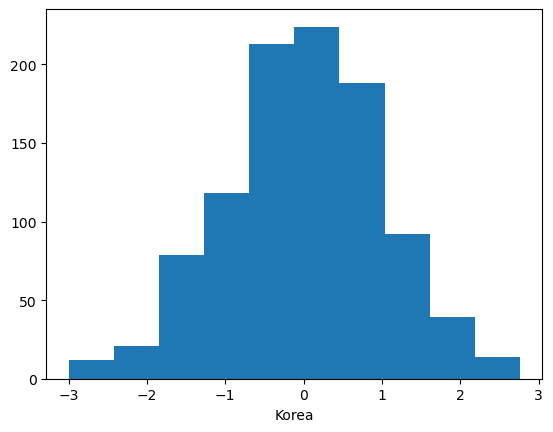

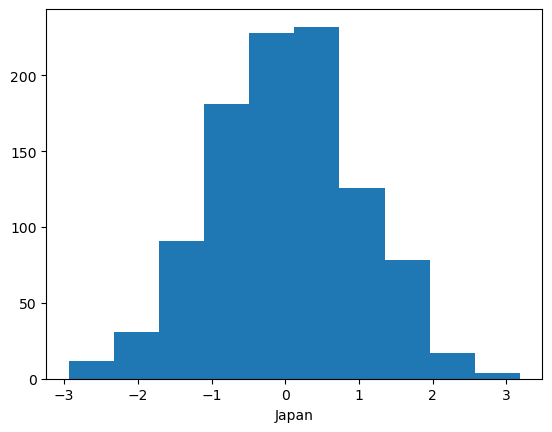

In [35]:
# 표준화된 데이터에 대한 히스토그램
plt.hist(meat_consumption["한국인_정규화"])
plt.xlabel('Korea')
plt.show()
plt.hist(meat_consumption["일본인_정규화"])
plt.xlabel('Japan')
plt.show()

In [36]:
# Min-Max by 2 methods
# Method1: MinMaxScaler() 함수 이용
# 기존 데이터프레임에 새로운 표준화된 컬럼을 추가
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
meat_consumption["한국인_mm"] = scaler.fit_transform(meat_consumption[["한국인"]])

scaler = MinMaxScaler()
meat_consumption["일본인_mm"] = scaler.fit_transform(meat_consumption[["일본인"]])

meat_consumption[["한국인", "일본인", "한국인_mm", "일본인_mm"]].head()

,한국인,일본인,한국인_mm,일본인_mm
0,54.345164,28.501062,0.528219,0.302242
1,56.963838,38.921601,0.622794,0.730845
2,52.161936,34.688692,0.449370,0.556743
3,50.748484,39.656851,0.398322,0.761086
4,53.227220,38.833050,0.487844,0.727203


In [37]:
# Method2: 수식 직접 입력
Min = np.min(meat_consumption_korean)
Max = np.max(meat_consumption_korean)
meat_consumption["한국인_mm2"] = (meat_consumption[["한국인"]] - Min) / (Max - Min)

Min = np.min(meat_consumption_japan)
Max = np.max(meat_consumption_japan)
meat_consumption["일본인_mm2"] = (meat_consumption[["일본인"]] - Min) / (Max - Min)

meat_consumption[["한국인_mm", "일본인_mm", "한국인_mm2", "일본인_mm2"]].head()

,한국인_mm,일본인_mm,한국인_mm2,일본인_mm2
0,0.528219,0.302242,0.528219,0.302242
1,0.622794,0.730845,0.622794,0.730845
2,0.449370,0.556743,0.449370,0.556743
3,0.398322,0.761086,0.398322,0.761086
4,0.487844,0.727203,0.487844,0.727203
